# IMPORT MODULES

In [62]:
import pandas as pd
import nltk

# READ DATASET

In [63]:
df=pd.read_csv("https://drive.google.com/uc?id=1JBx3SGfSllPzfhtxXBzsKY76gJ3UkshV",encoding="latin-1")

In [64]:
df.head(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN


In [65]:
df.shape

(5572, 5)

In [66]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [67]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)

In [69]:
df.sample(10)

,class,sms
4990,ham,We made it! Eta at taunton is 12:30 as planned...
5111,ham,I've reached sch already...
878,spam,U have a secret admirer who is looking 2 make ...
2455,ham,"Abeg, make profit. But its a start. Are you us..."
1218,ham,K..k..i'm also fine:)when will you complete th...
744,ham,Men like shorter ladies. Gaze up into his eyes.
2068,ham,Its hard to believe things like this. All can ...
3069,ham,I'm now but have to wait till 2 for the bus to...
5475,ham,Dhoni have luck to win some big title.so we wi...
1849,ham,You got job in wipro:)you will get every thing...


# FILTERING THE DUPLICATES

In [70]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [71]:
df=df.drop_duplicates(keep='first')

In [72]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516                         Rofl. Its true to its name    1
spam    653    653  This is the 2nd time we have tried 2 contact u...    1

# DATA VISUALIZATION

In [73]:
df['length']=df['sms'].apply(len)

In [74]:
df.head(5)

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

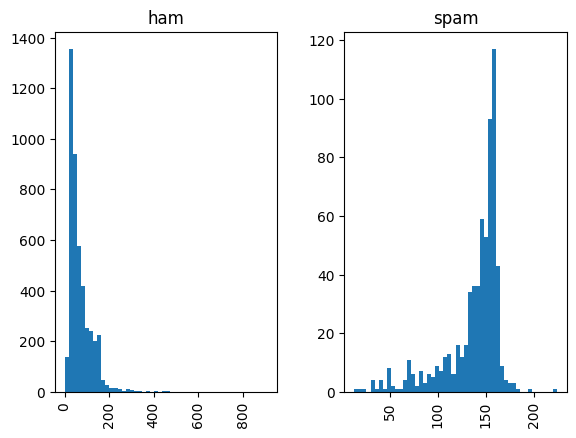

In [75]:
df.hist(column='length',by='class',bins=50)

# PREPROCESSING

In [76]:
import nltk
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('punkt_tab')

ps=PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [77]:
df.head(5)

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessin Tasks:


*  Lower case
*  Tokenization
*  Removing Special Characters
*  Removing stop words and punctuation
*  Stemming

In [78]:
import string

def clean_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [ ]:
df['sms_cleaned']=df['sms'].apply(clean_text)

In [ ]:
df.head(10)

# FEATURE EXTRACTION

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_vec=TfidfVectorizer(max_features=3000)
X=tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [ ]:
X.shape

In [ ]:
Y=df['class'].values

# LEARNING

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_train,Y_train)

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred=model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))